# imports

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from prophet import Prophet

# weather df

In [4]:
weather = pd.read_csv('data/madrid_weather.csv', parse_dates=['time'])
weather.head()

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-01-01 00:59:00,3.1,0.65,64,50,949,0,0.0
1,2019-01-01 01:59:00,2.9,0.95,32,49,949,0,0.0
2,2019-01-01 02:59:00,3.1,0.87,62,46,949,0,0.0
3,2019-01-01 03:59:00,1.9,0.73,75,51,949,0,0.0
4,2019-01-01 04:59:00,0.7,0.57,53,56,949,0,0.0


In [10]:
time_temperature_df = weather.set_index('time').loc[:, "temperature"]
time_temperature_df.head(20)

time
2019-01-01 00:59:00     3.1
2019-01-01 01:59:00     2.9
2019-01-01 02:59:00     3.1
2019-01-01 03:59:00     1.9
2019-01-01 04:59:00     0.7
2019-01-01 05:59:00     0.5
2019-01-01 06:59:00     0.0
2019-01-01 07:59:00    -0.8
2019-01-01 08:59:00     0.0
2019-01-01 09:59:00     2.2
2019-01-01 10:59:00     3.1
2019-01-01 11:59:00     5.5
2019-01-01 12:59:00     7.8
2019-01-01 13:59:00    10.1
2019-01-01 14:59:00    10.4
2019-01-01 15:59:00    11.9
2019-01-01 16:59:00    10.1
2019-01-01 17:59:00     8.5
2019-01-01 18:59:00     7.7
2019-01-01 19:59:00     7.1
Name: temperature, dtype: float64

<AxesSubplot:xlabel='time'>

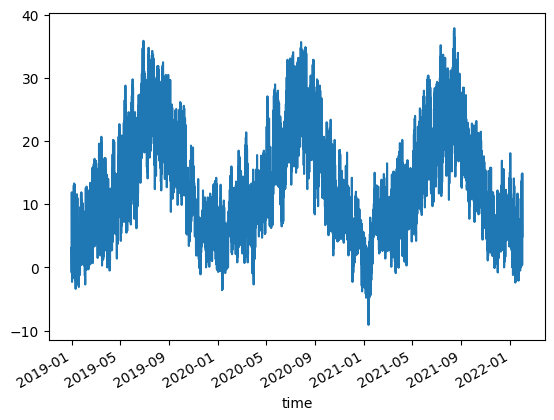

In [5]:
# 3 years of data
weather.set_index('time').loc[:, "temperature"].plot()

<AxesSubplot:xlabel='time'>

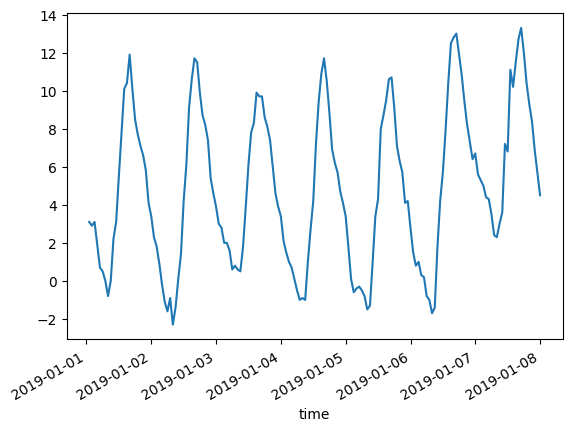

In [6]:
# the 1st week
weather.set_index('time').loc[:"2019-01-07", "temperature"].plot()

# rolling avg

<AxesSubplot:xlabel='time'>

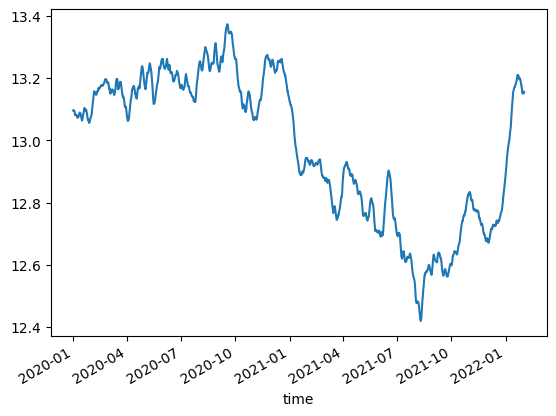

In [8]:
# 24 = daily moving avg
daily = 24
# 24 * 30 = 30-day moving avg
monthly = 24 * 30
# 24 * 365 = yearly moving avg
yearly = 24 * 365

weather.set_index('time').loc[:, "temperature"].rolling(yearly).mean().plot()

In [ ]:
weather.set_index('time').loc[:, "temperature"].rolling(24*30).mean().plot()

In [ ]:
weather.set_index('time').loc[:, "temperature"].rolling(24*365).mean().plot()

# Linear Regression forecast

# Prophet

## set index to time column

In [ ]:
weather.set_index('time', inplace=True)

## split train/test

In [ ]:
weather_train = weather["2019-05-17":"2019-05-31"].reset_index()
weather_train

In [ ]:
weather_test = weather["2019-06-01":"2019-06-03"].reset_index()

## prophet model

In [ ]:
weather_train = weather_train.rename(columns={"time": "ds", "temperature": "y"})
weather_train

In [ ]:
model = Prophet()
model.fit(weather_train)

## make_future_dataframe()

In [ ]:
future = model.make_future_dataframe(periods=72, freq="H")
forecast = model.predict(future)
model.plot(forecast)

In [ ]:
print(type(future), type(forecast))

In [ ]:
future.head(10)

In [ ]:
forecast.head(10)

# Demo: Prophet 

In [ ]:
weather = pd.read_csv('data/madrid_weather.csv', parse_dates=['time'])
monthly_weather = (
    weather
    .set_index('time')
    .resample('M')
    .agg({'temperature': 'mean'})
    .reset_index()
    .rename(columns={'time': 'ds', 'temperature': 'y'})
)
monthly_weather

## train test split

In [ ]:
# train on first 8 months
train = monthly_weather[:-4]
train

In [ ]:
# test on last 4 months
test = monthly_weather[-4:]
test 

## Prophet model

In [ ]:
model = Prophet()
model.fit(train)

In [ ]:
future_df = model.make_future_dataframe(periods=4, freq='M')
forecast_df = model.predict(future_df)
model.plot(forecast_df)